# Data Preparation, EDA, Model Building and Evaluation

## 1.Data Preparation

In [1]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [168]:
## 1. Loading the Data
df=pd.read_csv('train.csv')
dataset=df.copy
## print dataset Shape
df.shape



(1460, 81)

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
# describing columnsof data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 2.  EDA- Exploratory Data Analysis


## check Null Values


In [41]:

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Skewed_SP          0
Length: 82, dtype: int64

In [169]:
df_with_nan=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in df_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 3),  ' % NAN values')

LotFrontage 0.177  % NAN values
Alley 0.938  % NAN values
MasVnrType 0.005  % NAN values
MasVnrArea 0.005  % NAN values
BsmtQual 0.025  % NAN values
BsmtCond 0.025  % NAN values
BsmtExposure 0.026  % NAN values
BsmtFinType1 0.025  % NAN values
BsmtFinType2 0.026  % NAN values
FireplaceQu 0.473  % NAN values
GarageType 0.055  % NAN values
GarageYrBlt 0.055  % NAN values
GarageFinish 0.055  % NAN values
GarageQual 0.055  % NAN values
GarageCond 0.055  % NAN values
PoolQC 0.995  % NAN values
Fence 0.808  % NAN values
MiscFeature 0.963  % NAN values


# Check numerical, datetime, continous, discreet and categorical variables








In [42]:
numerical_variable = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables= ', len(numerical_variable))

# visualise the numerical variables
df[numerical_variable].head()

Number of numerical variables=  39


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Skewed_SP
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,12.429220


In [52]:
# visualize year information variables
year_variable = [feature for feature in numerical_variable if 'Yr' in feature or 'Year' in feature]

year_variable

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [69]:
# visualize continous and discrete variables

discrete_variable=[feature for feature in numerical_variable if len(df[feature].unique())<25 and feature not in year_variable+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_variable)))
discrete_variable

Discrete Variables Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [72]:
continuous_variable=[feature for feature in numerical_variable if feature not in discrete_variable+year_variable+['Id']]
print("Continuous feature Count {}".format(len(continuous_variable)))

continuous_variable

Continuous feature Count 17


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'Skewed_SP']

# Outliers

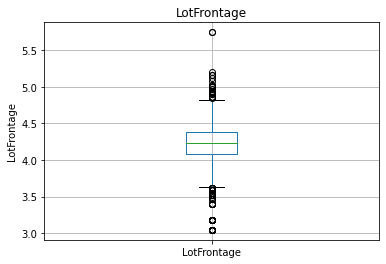

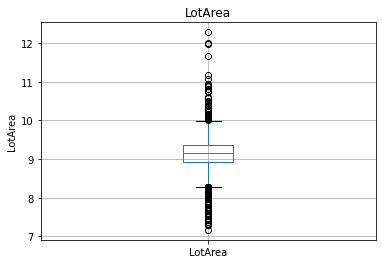

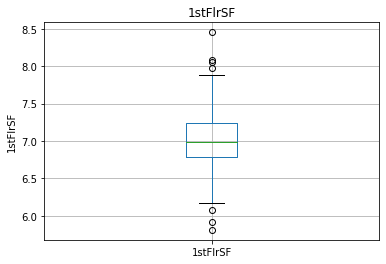

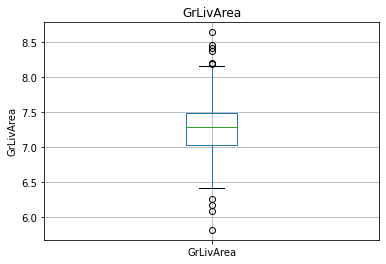

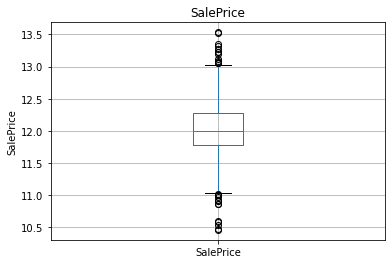

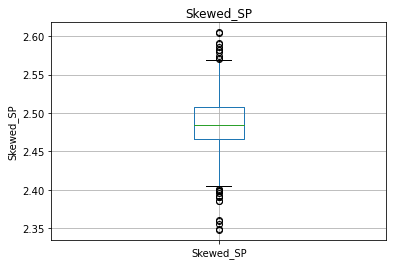

In [73]:
for feature in continuous_variable:
    dfset=df.copy()
    if 0 in dfset[feature].unique():
        pass
    else:
        dfset[feature]=np.log(dfset[feature])
        dfset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [84]:
categorical_variable=[feature for feature in df.columns if dfset[feature].dtypes=='O']
categorical_variable

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Data Visualization of variables/features relation with SalePrice

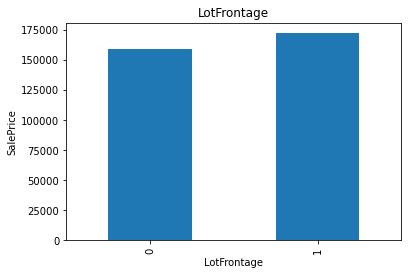

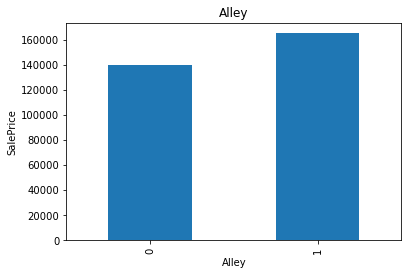

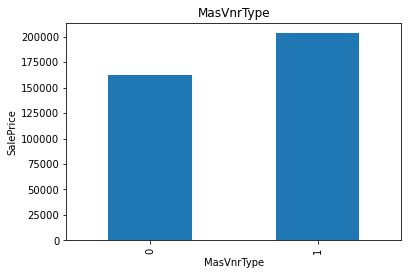

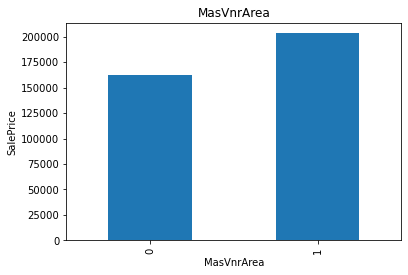

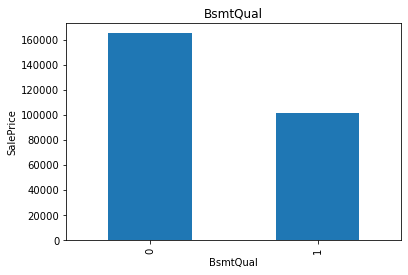

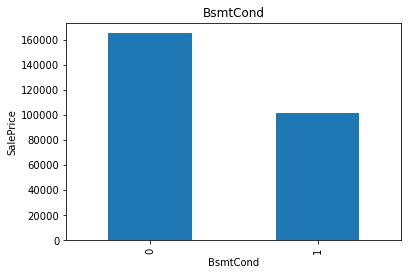

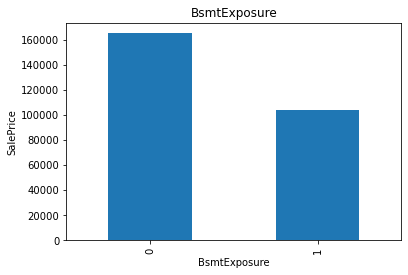

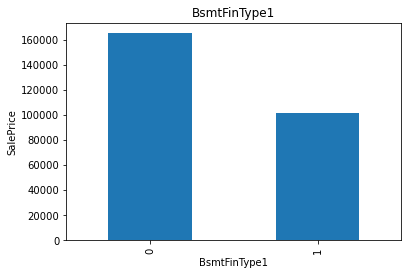

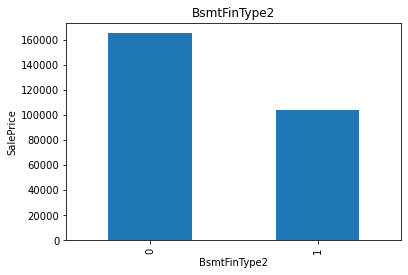

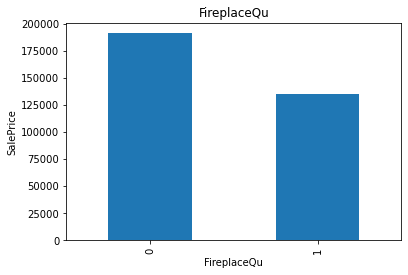

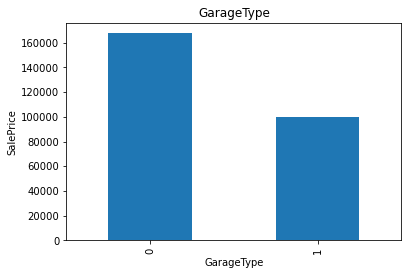

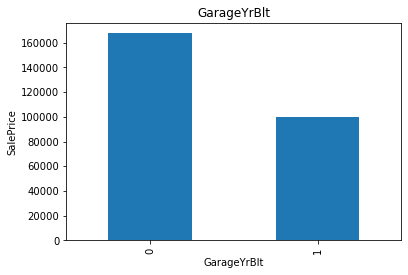

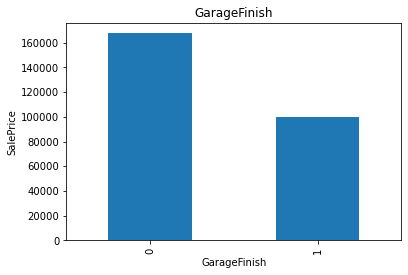

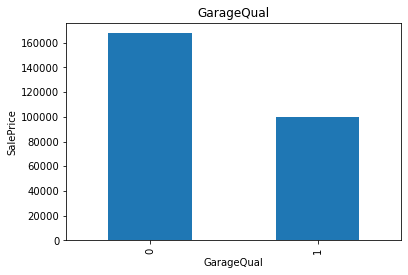

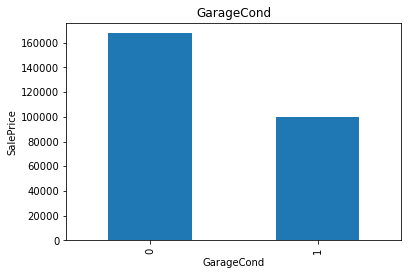

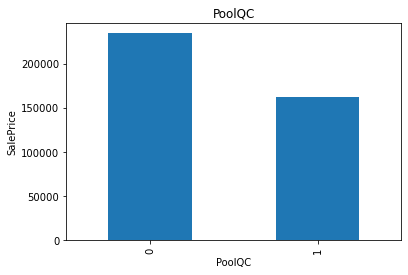

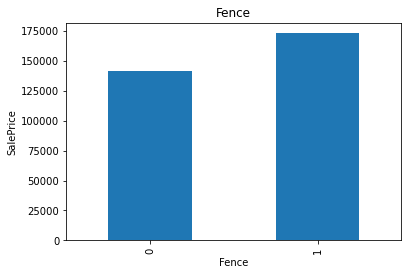

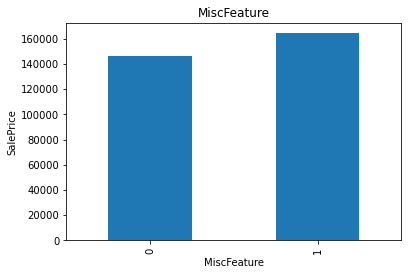

In [99]:
for feature in df_with_nan:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

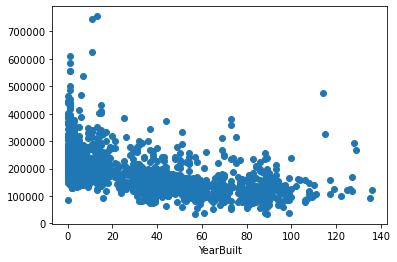

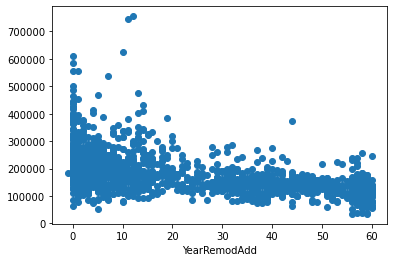

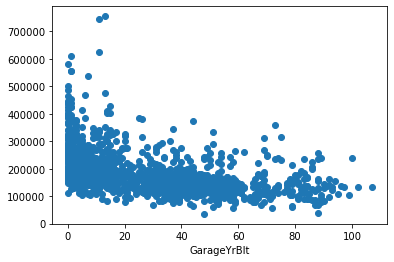

In [100]:

for feature in year_variable:
    if feature!='YrSold':
        data=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.show()



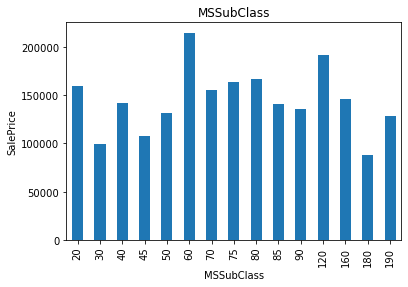

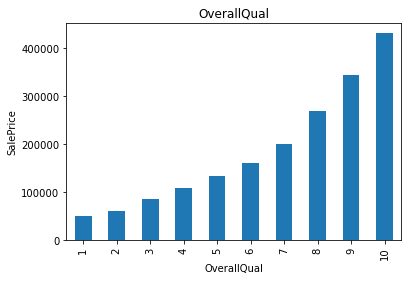

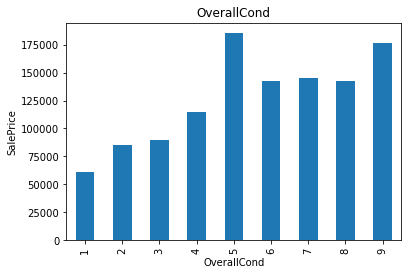

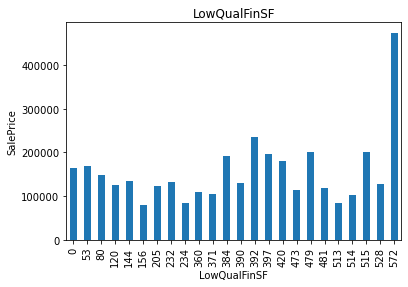

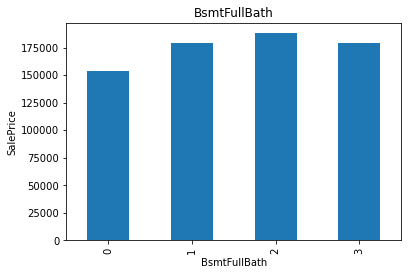

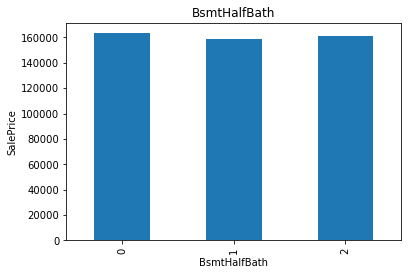

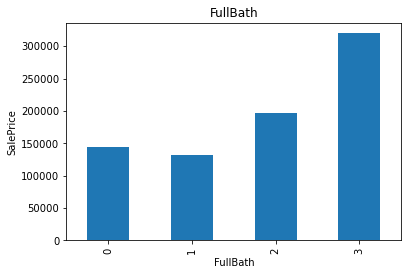

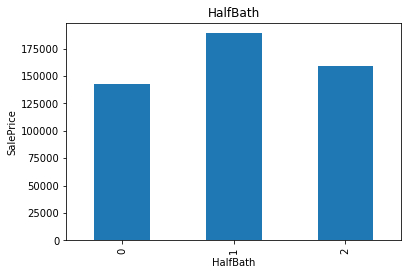

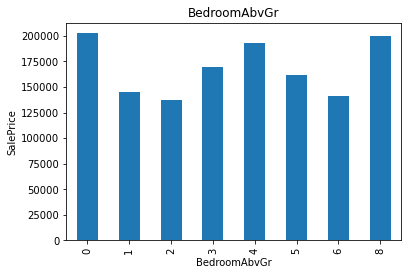

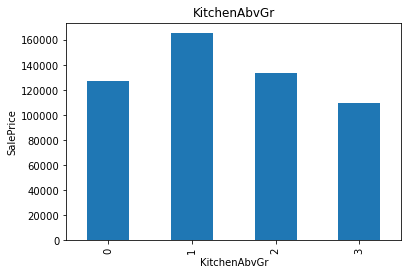

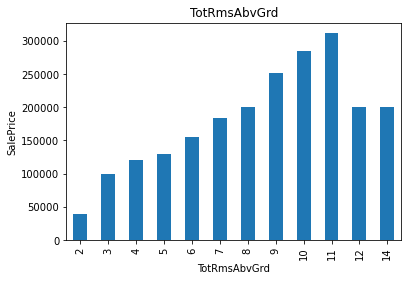

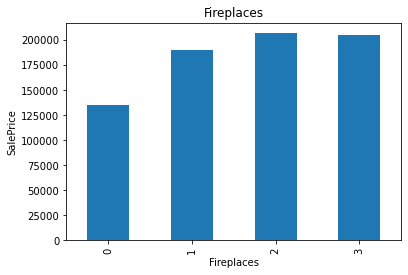

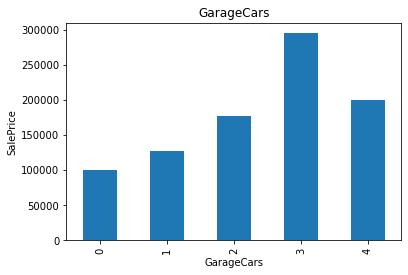

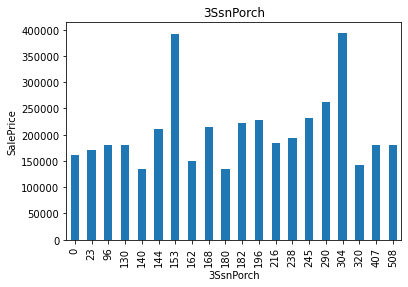

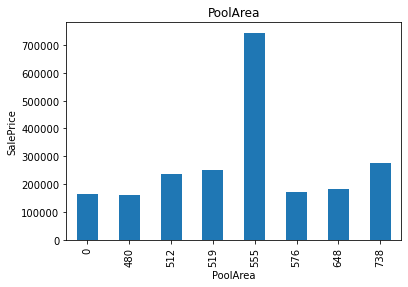

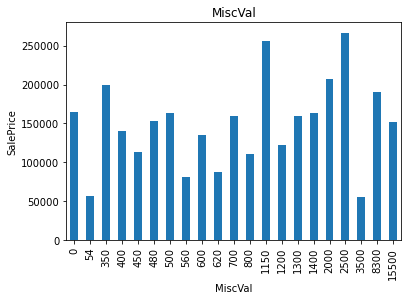

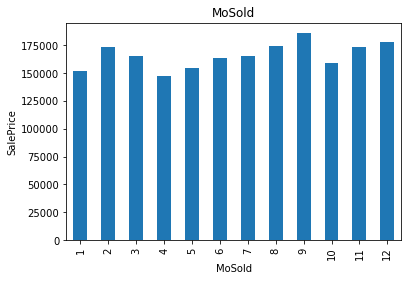

In [95]:
for feature in discrete_variable:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


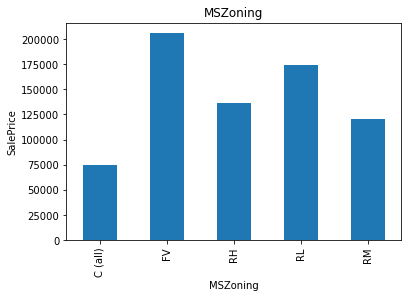

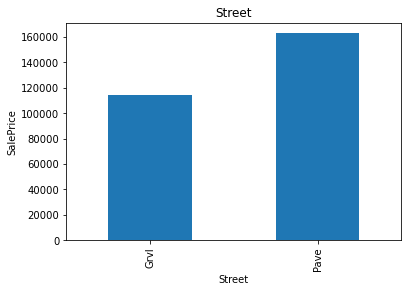

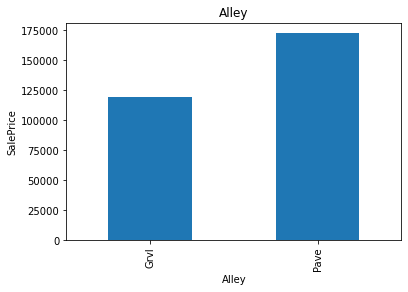

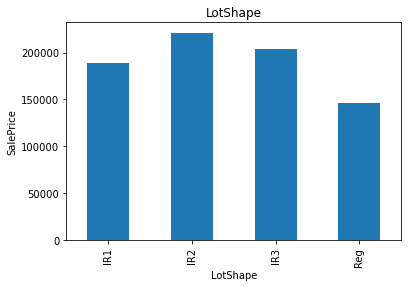

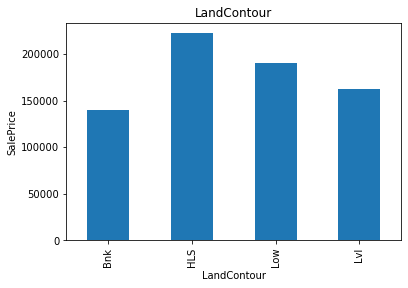

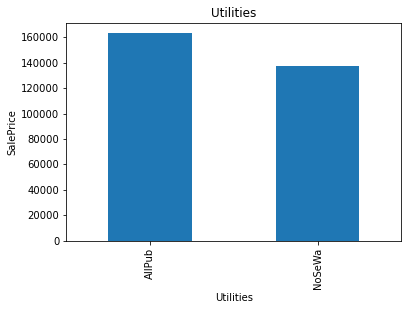

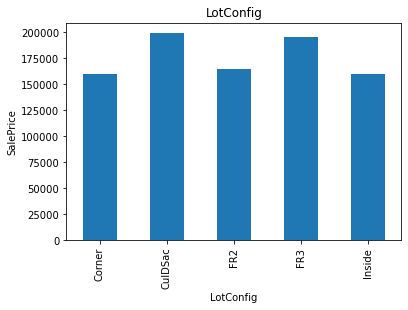

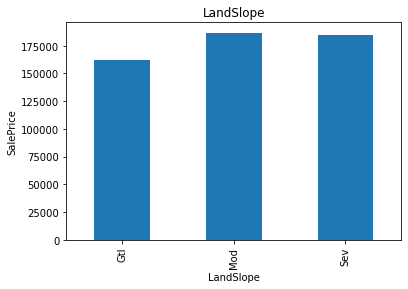

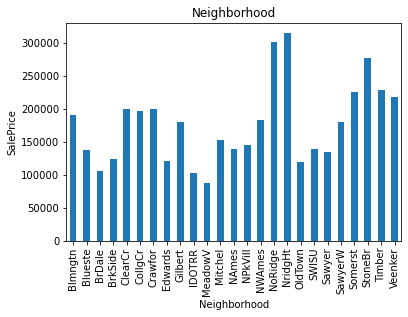

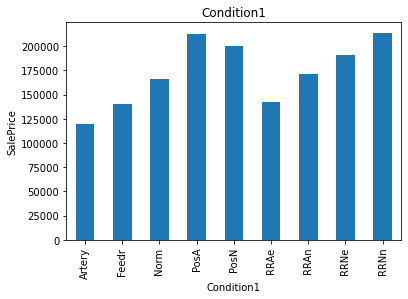

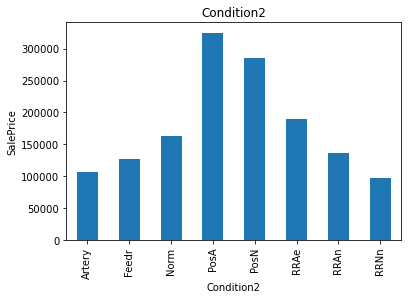

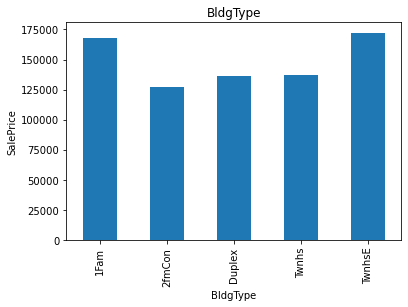

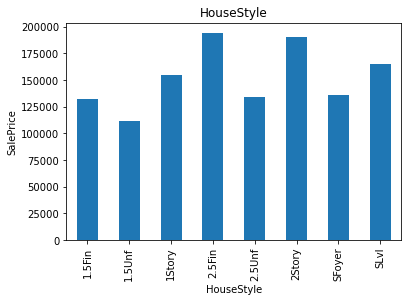

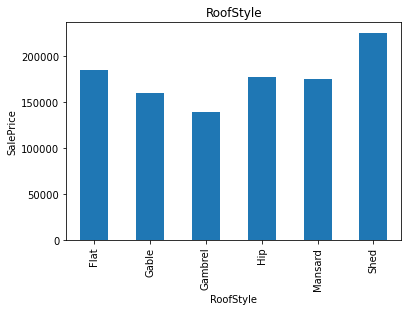

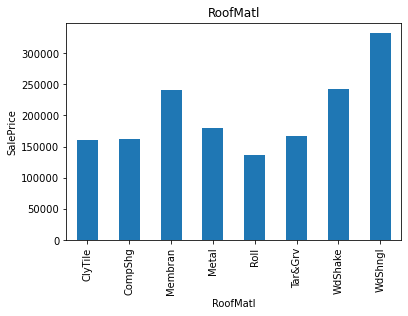

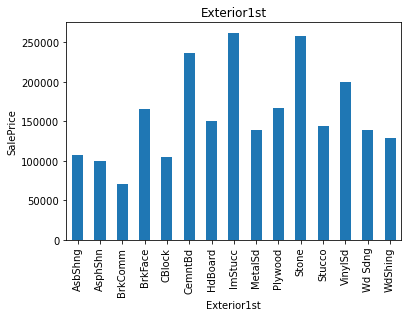

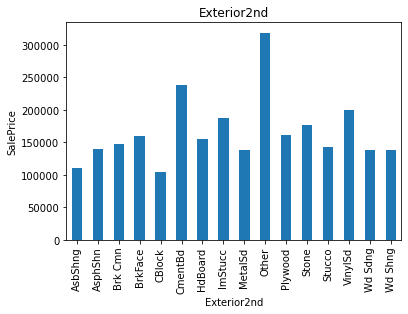

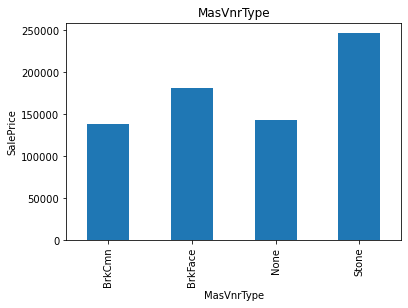

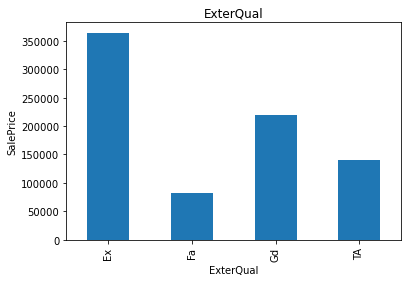

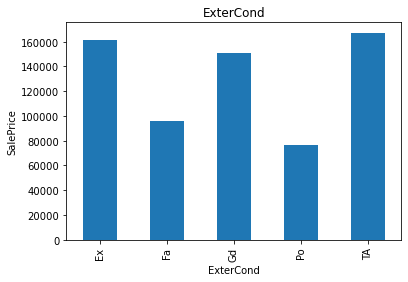

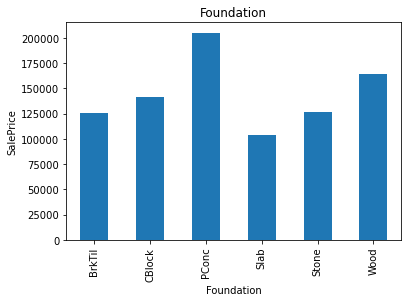

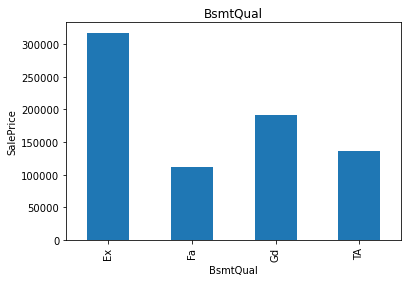

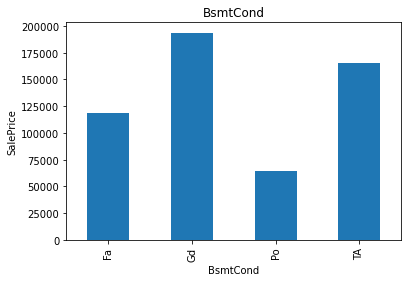

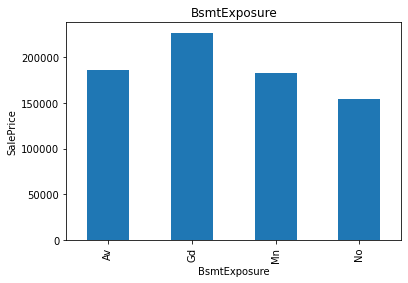

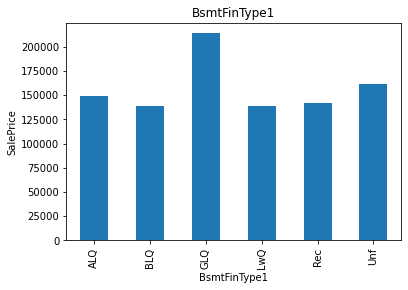

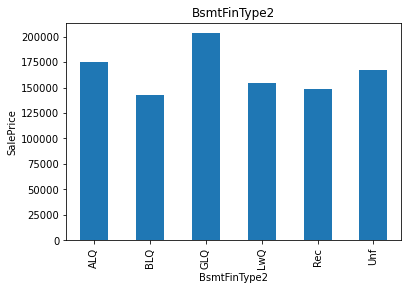

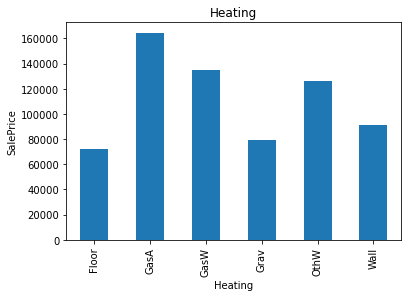

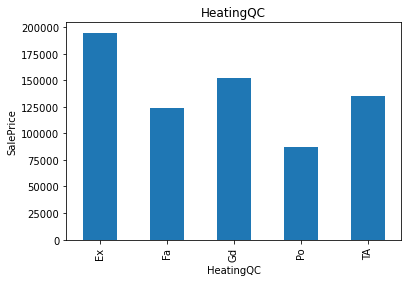

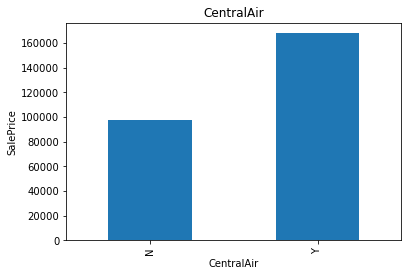

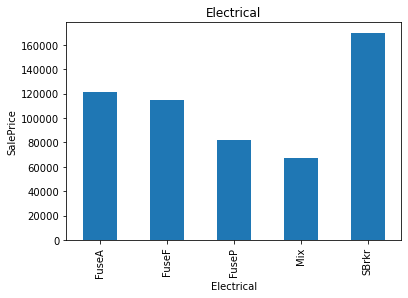

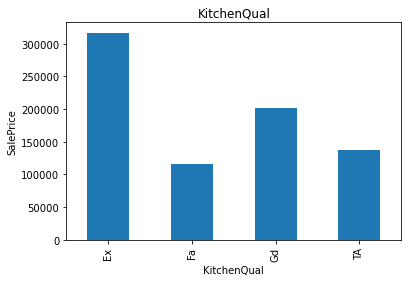

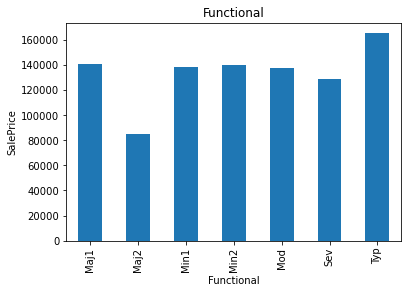

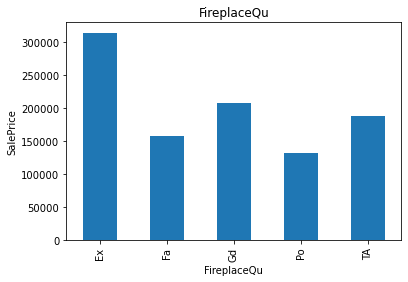

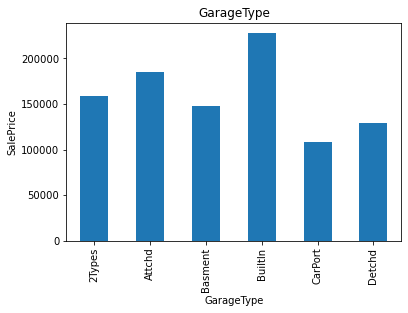

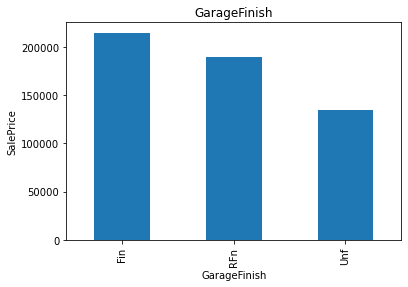

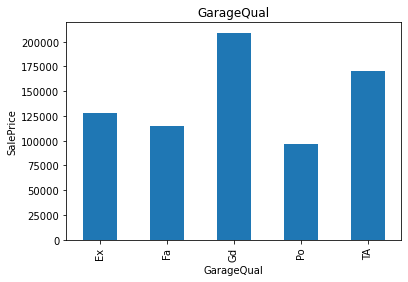

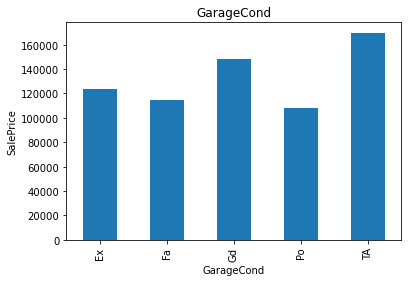

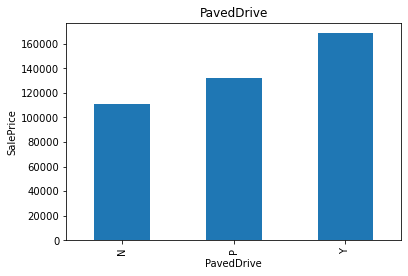

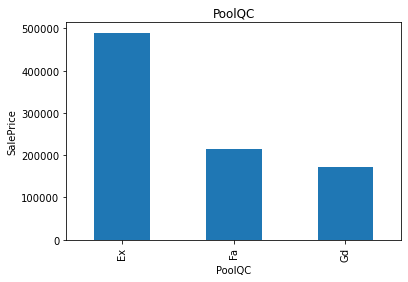

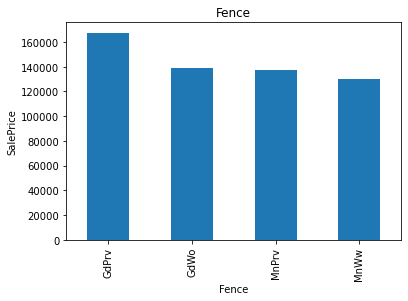

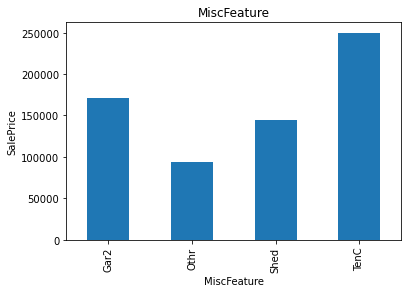

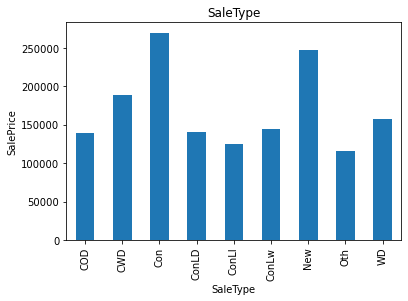

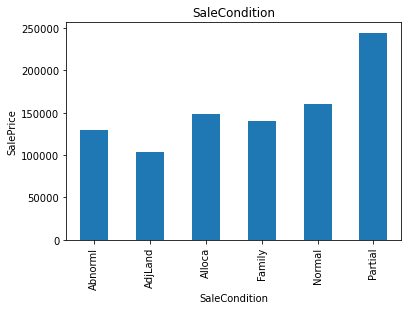

In [96]:
for feature in categorical_variable:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

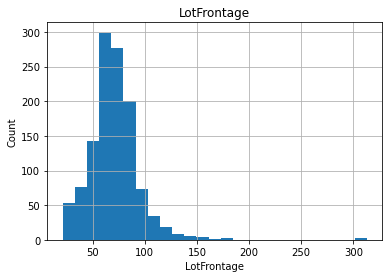

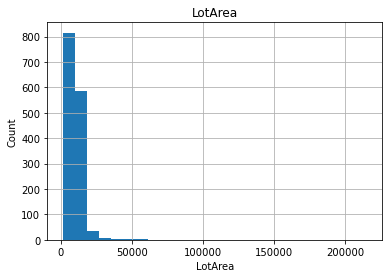

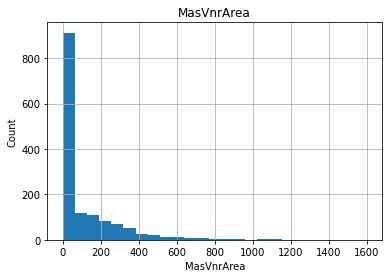

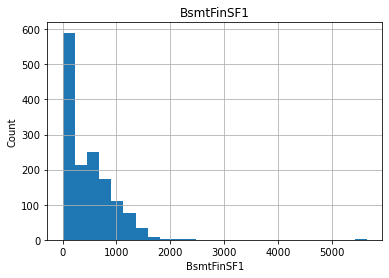

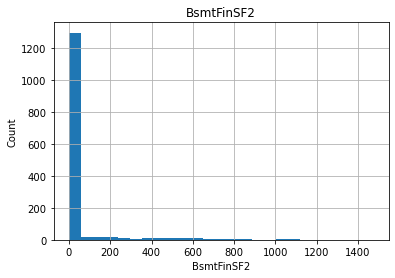

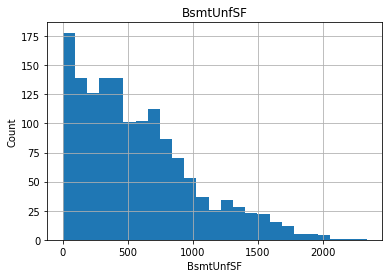

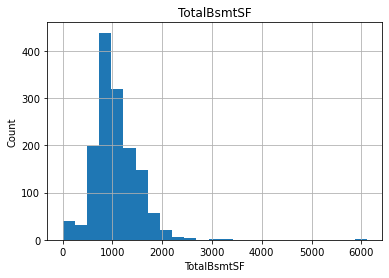

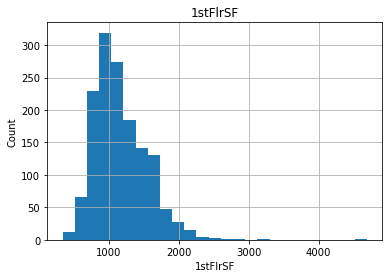

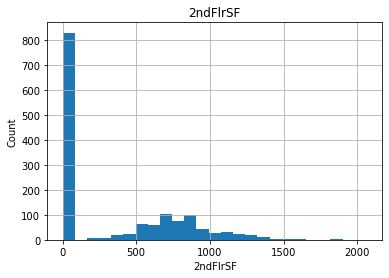

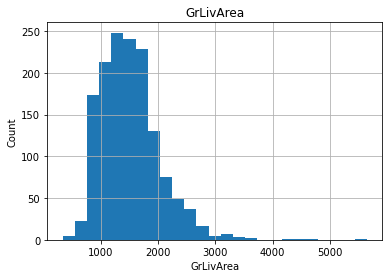

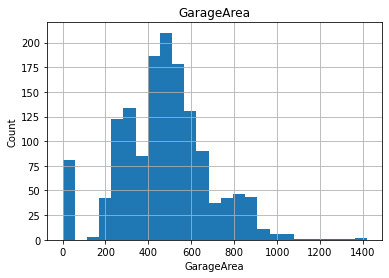

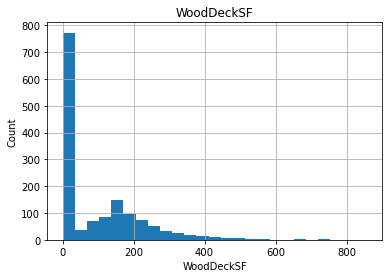

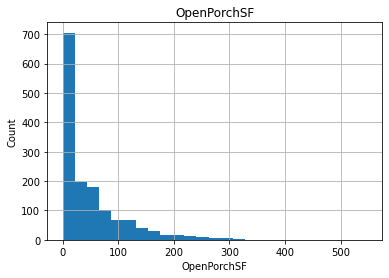

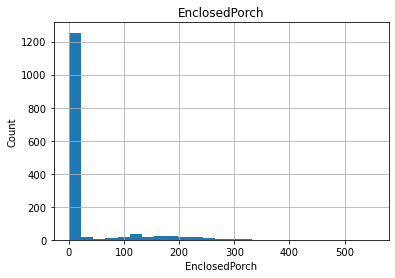

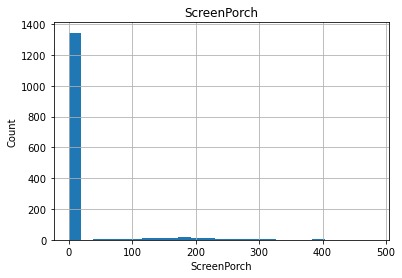

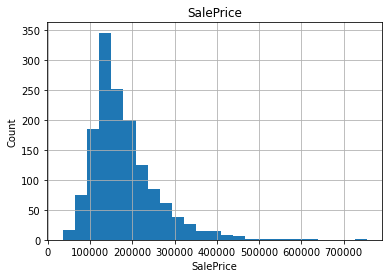

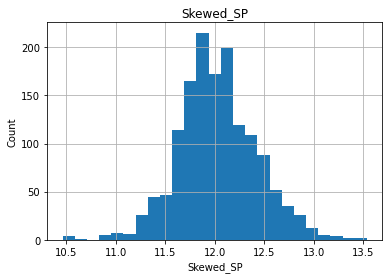

In [97]:
for feature in continuous_variable:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()



### Describe the metrics of Salesprice in the data 

In [101]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew = 1.8829


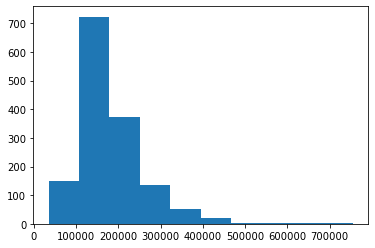

Skew = 0.1213


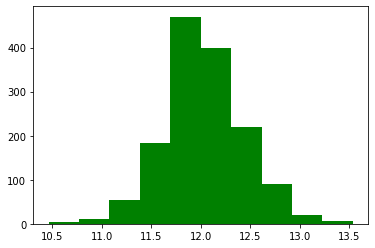

In [102]:
# Determining the Skewness of data 
print ("Skew =",np.round(df.SalePrice.skew(), 4))

plt.hist(df.SalePrice)
plt.show()
df['Skewed_SP'] = np.log(df['SalePrice']+1)
print ("Skew =",np.round(df['Skewed_SP'].skew(), 4))
plt.hist(df['Skewed_SP'], color='green')
plt.show()

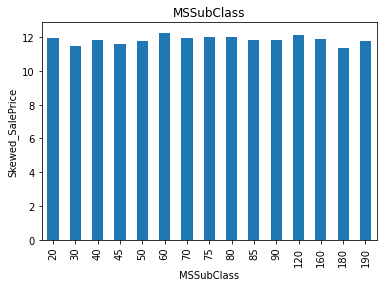

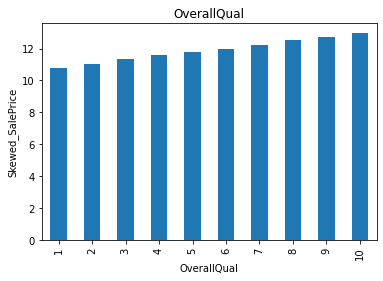

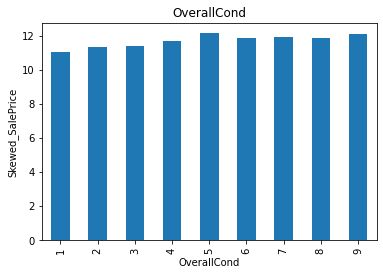

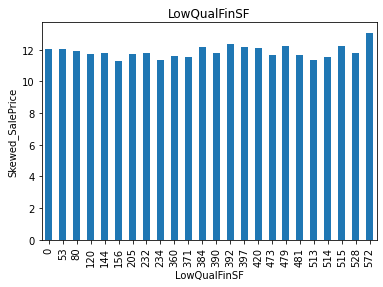

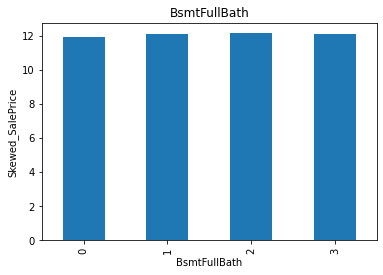

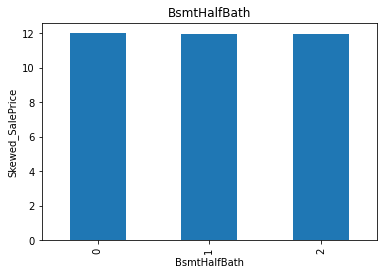

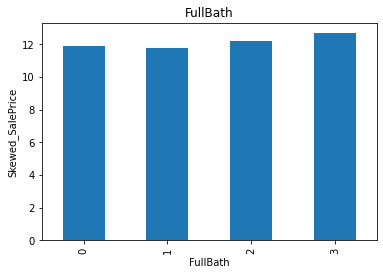

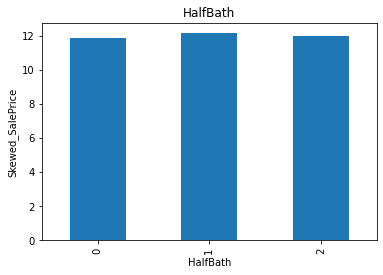

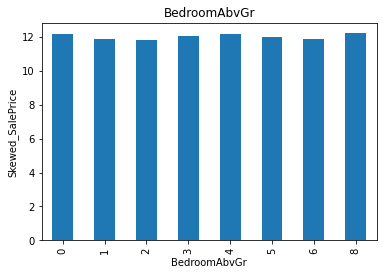

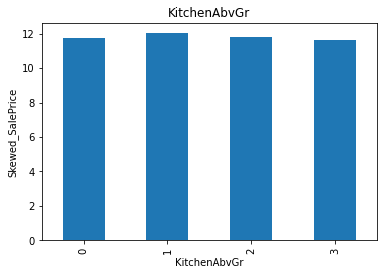

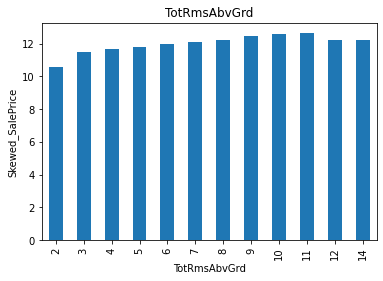

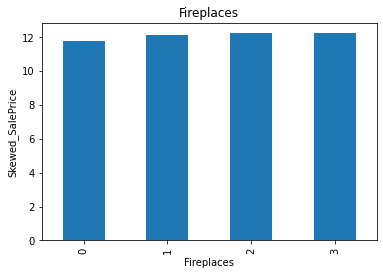

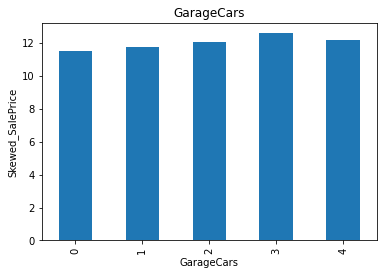

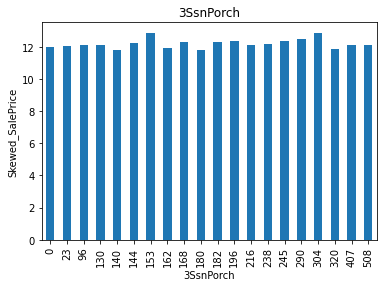

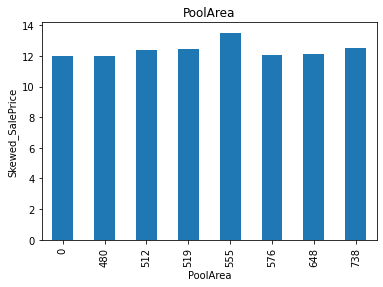

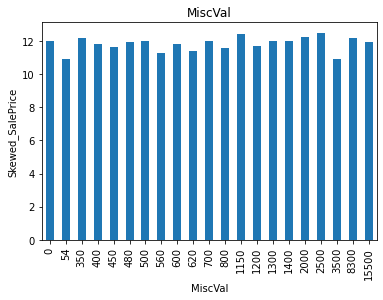

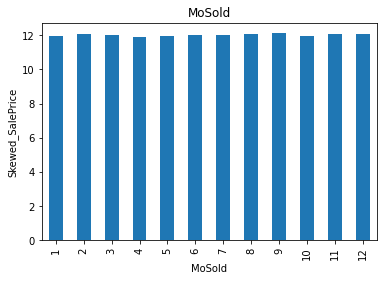

In [104]:
# Finding feature relation with the new skewed Saleprice 
for feature in discrete_variable:
    data.groupby(feature)['Skewed_SP'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Skewed_SalePrice')
    plt.title(feature)
    plt.show()

### Defining Correlation matrix betweeen features and target variable Saleprice and skewed Saleprice

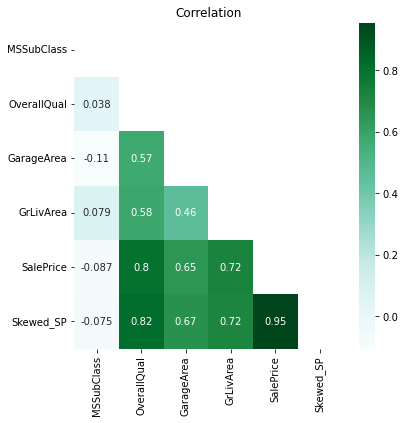

In [154]:
#correlation
plt.figure(figsize = (6,6))
matrix = np.triu(df[['MSSubClass','MSZoning','OverallQual','GarageArea','GrLivArea','SalePrice','Skewed_SP']].corr())
sns.heatmap(df[['MSSubClass','MSZoning','OverallQual','GarageArea','GrLivArea','SalePrice','Skewed_SP']].corr(), annot = True, cmap="BuGn", mask=matrix)
plt.title("Correlation")
plt.show()

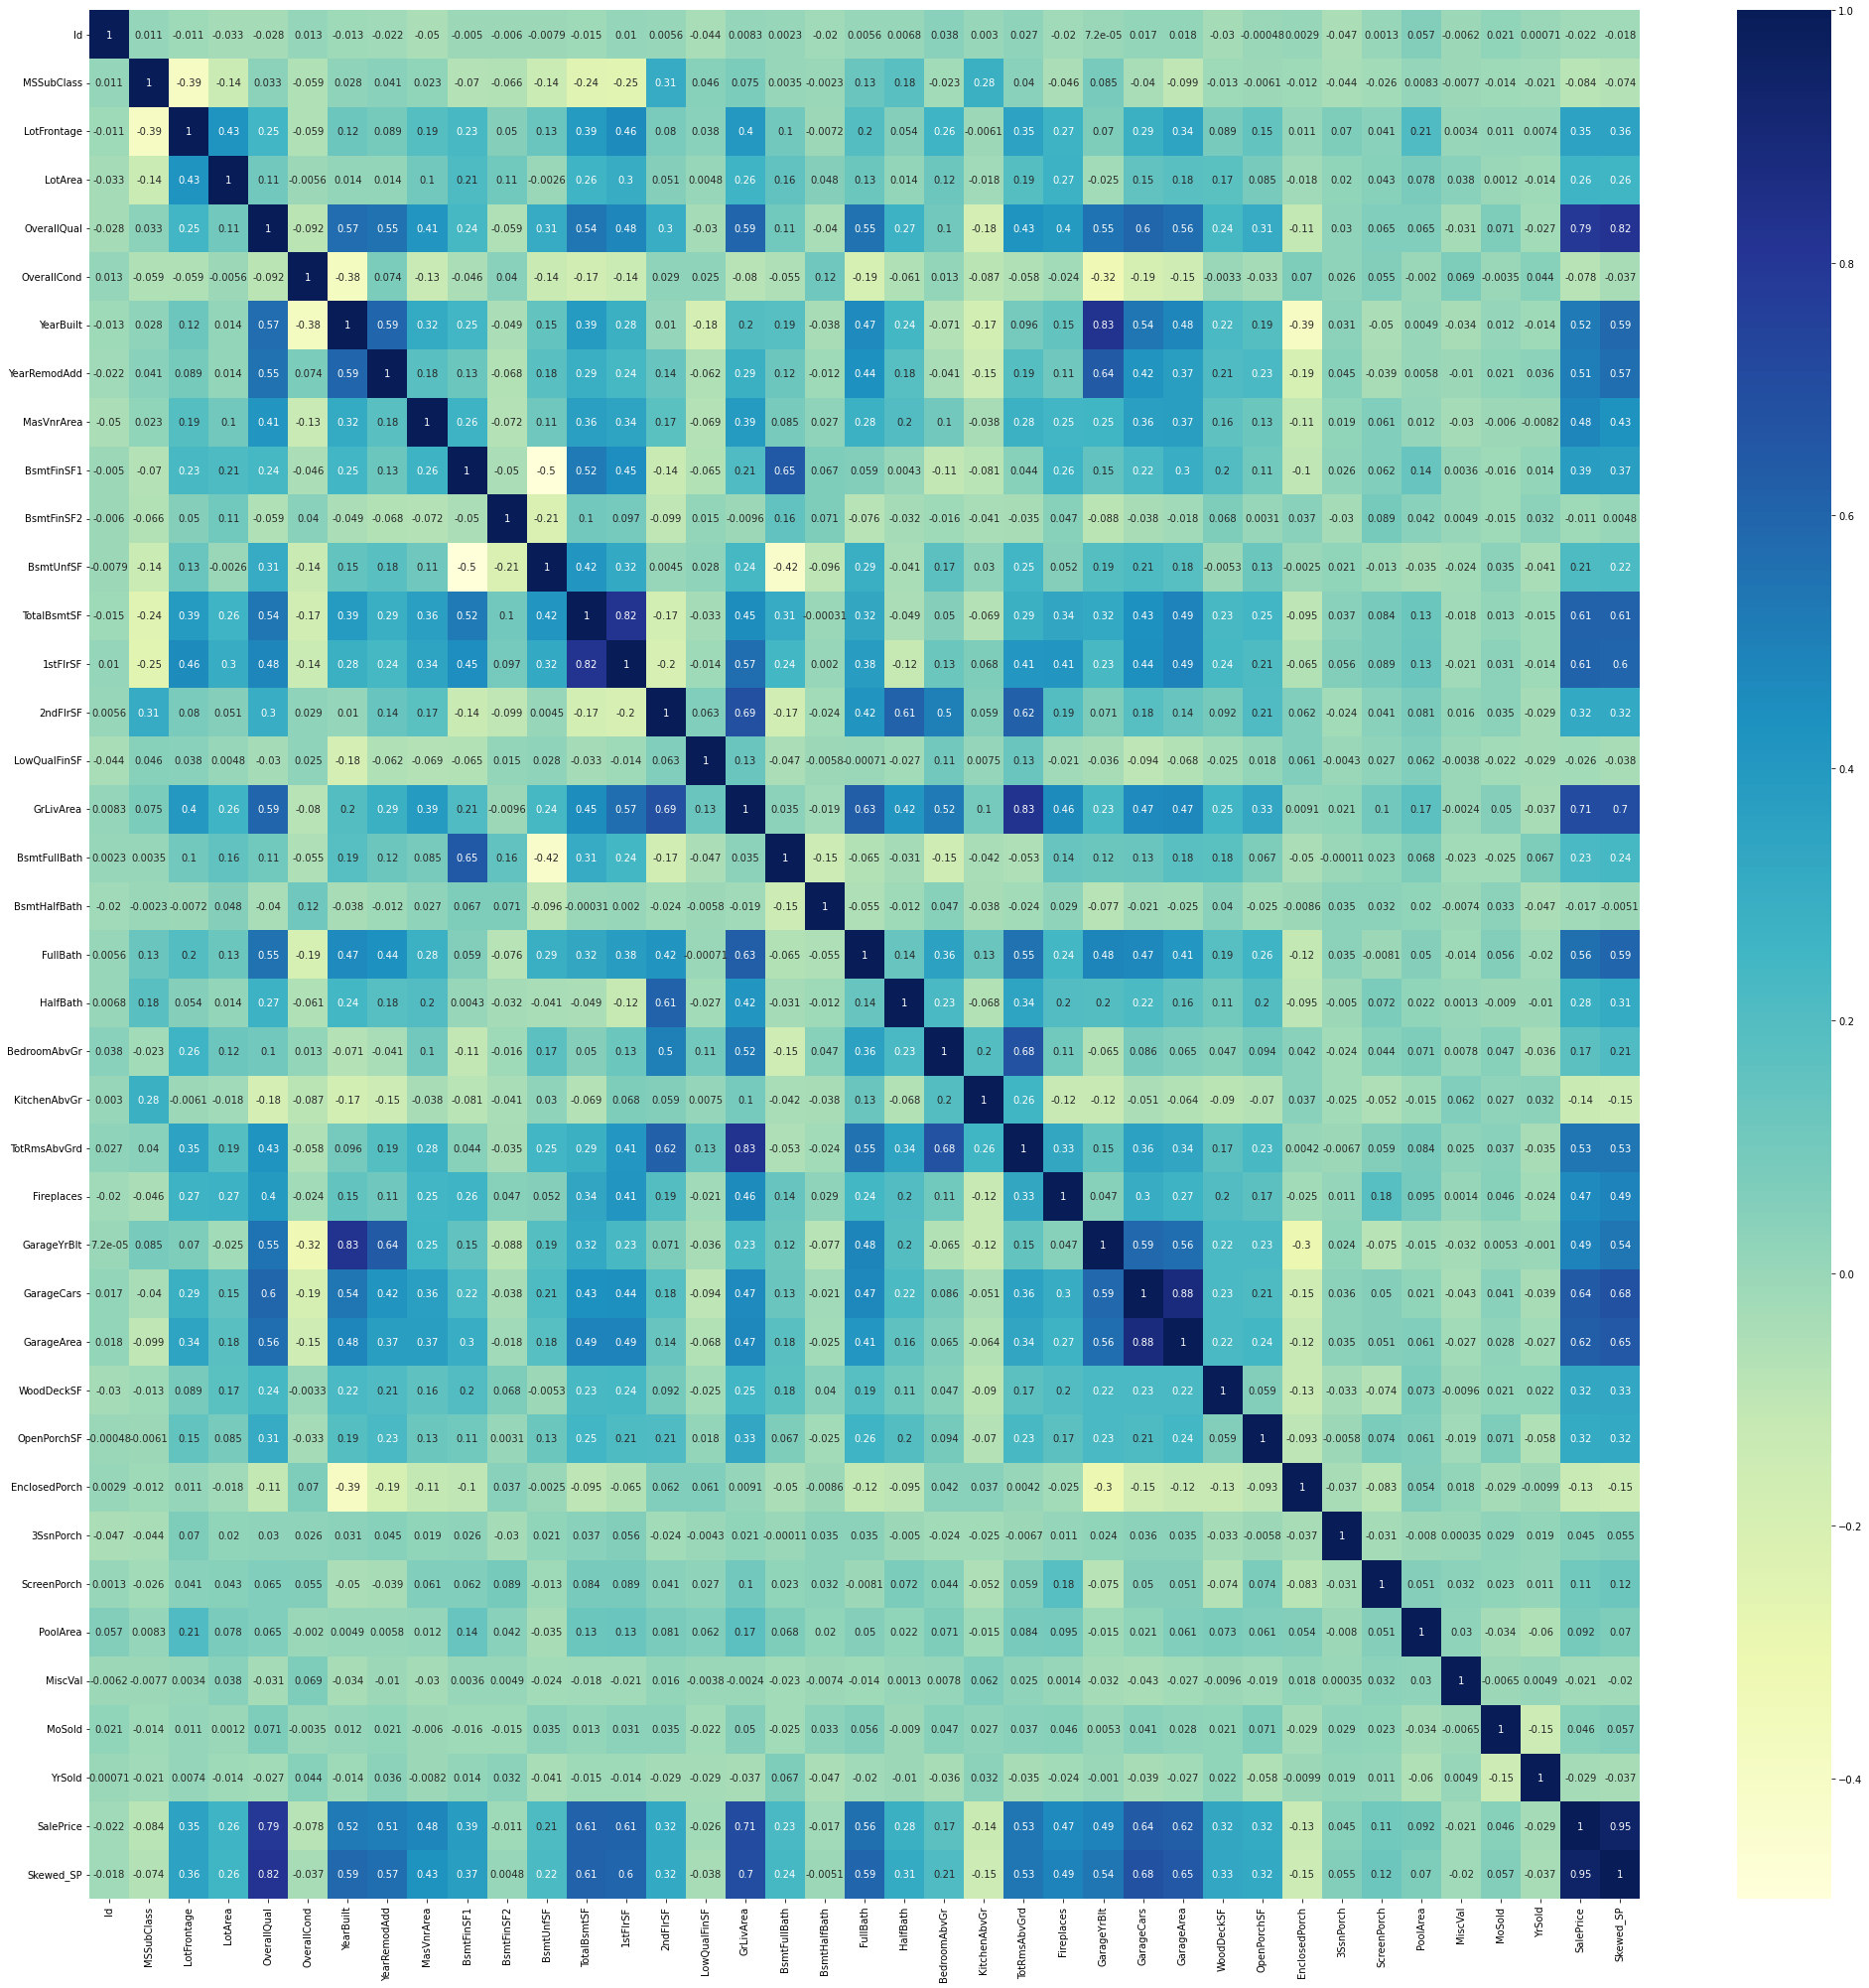

In [115]:
#Correlation 2

cor=df.corr()
plt.figure(figsize=(35,35))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### Looking from Correlation matrix determining the relation between target Saleprice and below some significant Variables
1. OverallQual
2. GrLivArea
3. GarageArea
4. Neighborhood

In [123]:
quality_pivot = df.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


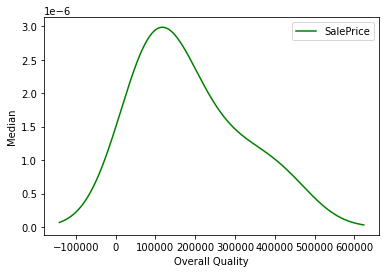

In [132]:
quality_pivot.plot(kind='density',color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

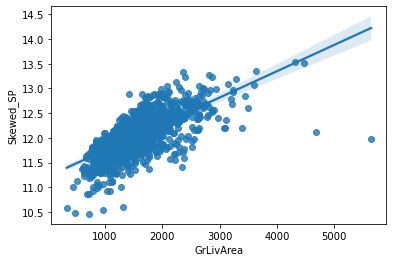

In [122]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

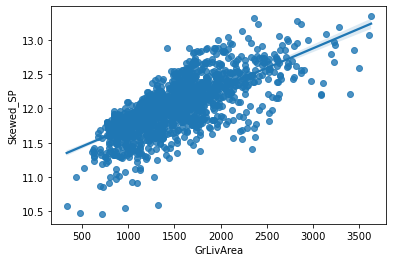

In [134]:
#Removing outliers
df = df[df['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

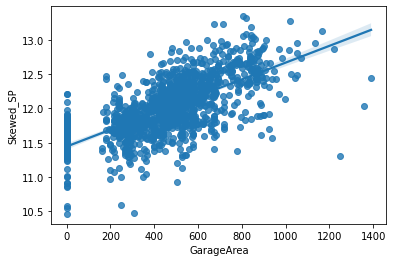

In [135]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=df)

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

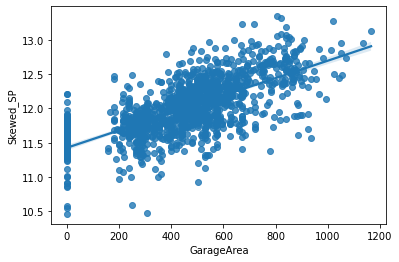

In [136]:
#Removing outliers
df = df[df['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=df)

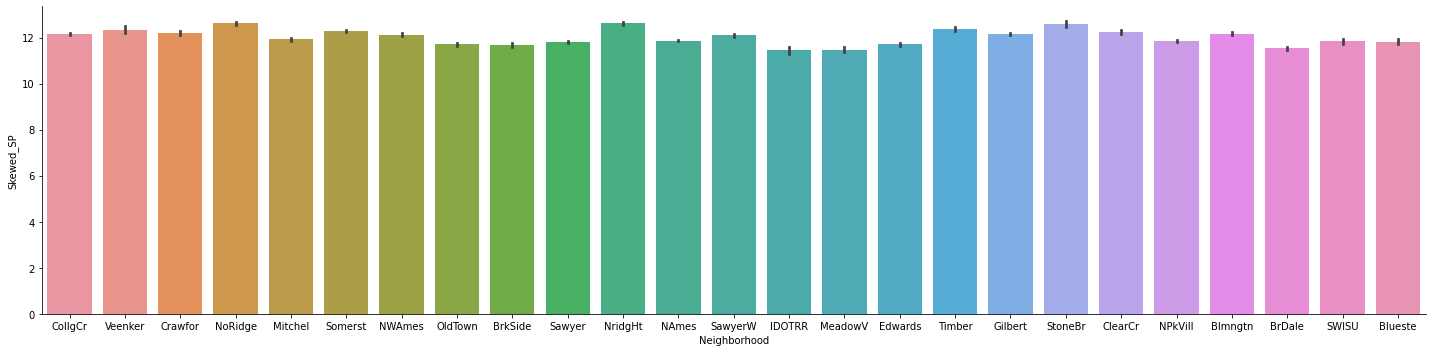

In [150]:
sns.factorplot(x='Neighborhood', y='Skewed_SP', data=df, kind='bar', aspect=4)

#### Dummy variabe creation 

In [156]:
df['enc_street'] = pd.get_dummies(df.Street, drop_first=True)
print (df.enc_street.value_counts())

1    1447
0       5
Name: enc_street, dtype: int64


In [157]:
#Data Interpolation
data = df.select_dtypes(include=[np.number]).interpolate().dropna()

In [158]:
sum(data.isnull().sum() != 0)

0

## 3. Model Building

In [159]:
y = np.log(df.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [176]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [193]:
y_pred = model.predict(X_test)

In [183]:
actual_values = y_test

Text(0.5, 1.0, 'Linear Regression')

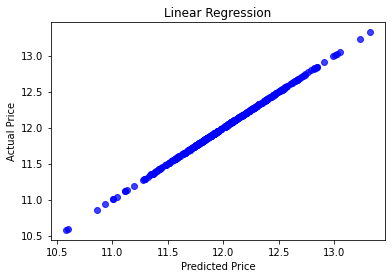

In [186]:
actual_values = y_test
plt.scatter(y_pred, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression')

In [195]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
# Root Mean Squared Error
rmse = mse**0.5
print(rmse)

3.47370931523888e-10
7.236894406747666e-13
8.506993832575445e-07


### Ridge Regression Model

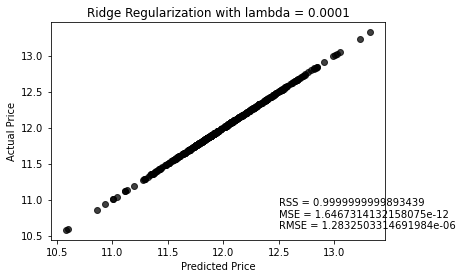

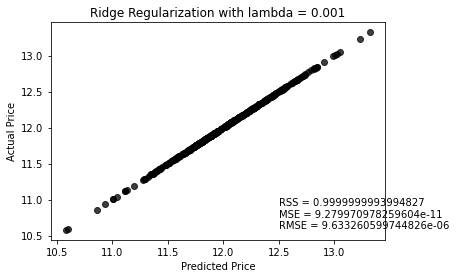

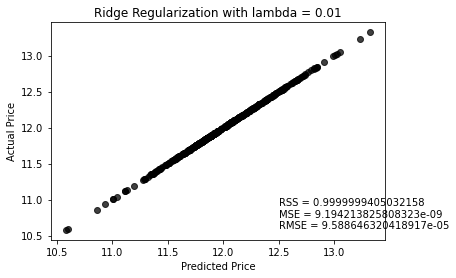

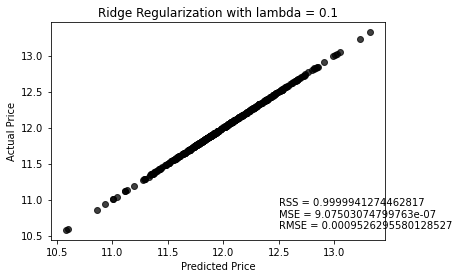

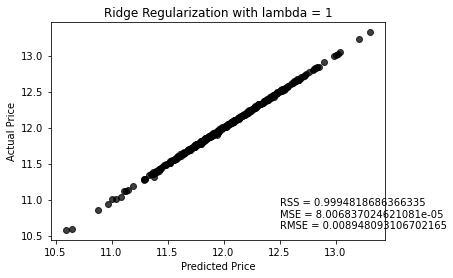

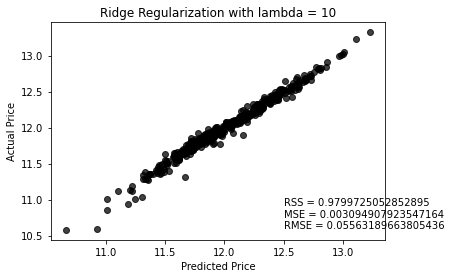

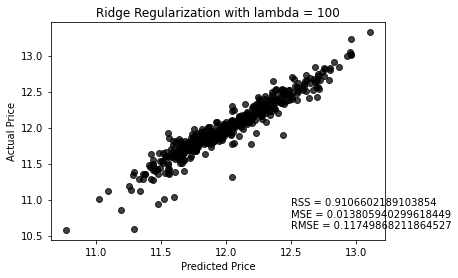

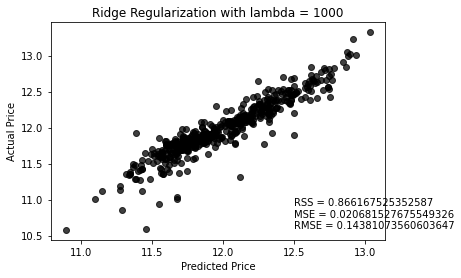

In [247]:
for i in range (-4, 4):
    lambdas = 10**i
    rm = linear_model.Ridge(alpha=lambdas)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='black')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with lambda = {}'.format(lambdas))
    
    values = 'RSS = {}\nMSE = {}\nRMSE = {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge),
                    mean_squared_error(y_test, preds_ridge)**0.5)
    plt.annotate(s=values,xy=(12.5,10.6))
    plt.show()
    

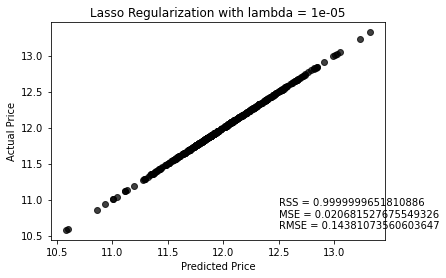

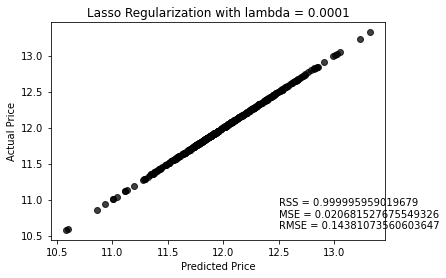

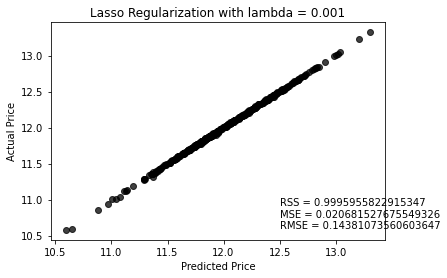

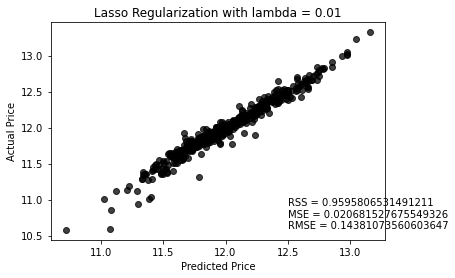

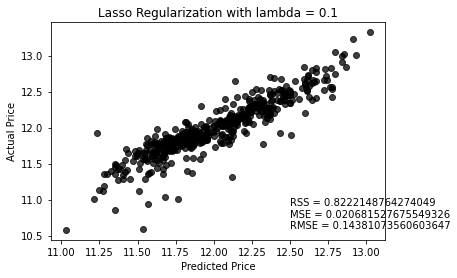

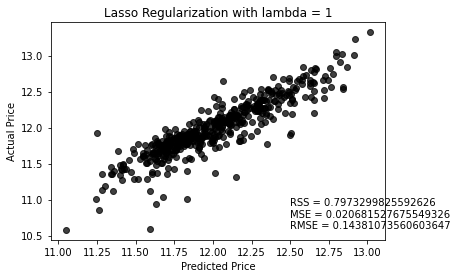

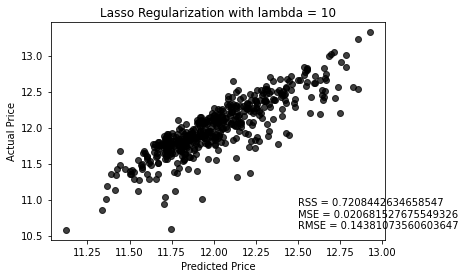

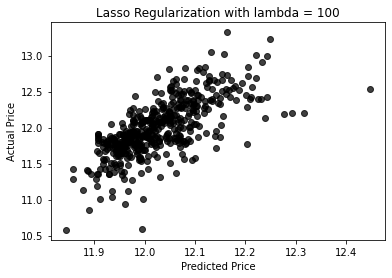

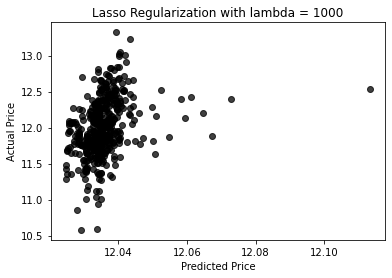

In [245]:

for i in range (-5, 4):
    lambdas = 10**i
    lm = linear_model.Lasso(alpha=lambdas)
    lasso_model = lm.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)
    
    plt.scatter(preds_lasso, actual_values, alpha=.75, color='black')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Lasso Regularization with lambda = {}'.format(lambdas))
    
    values = 'RSS = {}\nMSE = {}\nRMSE = {}'.format(
                    lasso_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge),
                    mean_squared_error(y_test, preds_ridge)**0.5)
    plt.annotate(s=values,xy=(12.5,10.6))
    plt.show()

## Determining the optimal value of lambda for ridge and lasso regression and Significant Variables


### For Ridge Regression Model at Lambda = 1 Predicted and Actual Values are proprtionately distributed
### For Lasso Regression Model at Lambda = 0.0001 Predicted and Actual Values are proprtionately distributed

### And below are some significant Variables
1. OverallQual
2. GrLivArea
3. GarageArea
4. Neighborhood
5. GarageCars
6. YearBuilt